In [2]:
#TODO: compare time series of large sale to time series of next auction's sales
#TODO: locations
#TODO: regressions, scikit
#TODO: plotly, can explore more
#TODO: standardize date-times with currency exchange rates

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
art_df = pd.read_csv('fina_artframe_2007-2017.csv')
art_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
0,132563,PAUL HUXLEY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,UNTITLED NO. 33,13181,4,10,2011,14981.03
1,132564,WILLIAM SCOTT,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,60000,AMSTERDAM,40000,CIRCLES DIMINISHING,57930,4,10,2011,65841.06
2,132565,BERNARD COHEN,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,WHEN WHITE,23066,4,10,2011,26215.95
3,132566,ANTONY DONALDSON,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,3000,AMSTERDAM,2000,BRING IT TO JEROME,35786,4,10,2011,40673.02
4,132567,ROBYN DENNY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,FOR EVER,10709,4,10,2011,12171.45


In [5]:
#Creating 5% sample from the dataframe
art_df_sample = art_df.sample(8700)
art_df_sample.head()


,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
79959,196985,HENRY LAMB,sotheby's | auctions - the irish sale,L08120,GBP,7-May-08,8000,LONDON,6000,"POTATO PICKERS, GOLA ISLAND",14673,7,5,2008,17423.21
6066,28185,DONG QICHANG 1555-1636,fine classical chinese paintings,HK0670,HKD,3-Oct-16,300000,HONG KONG,200000,LANDSCAPES AND POEMS,48350,3,10,2016,51502.78
57364,120028,"BASIL BLACKSHAW, H.R.H.A",sotheby's | auctions - victorian & edwardian a...,L12132,GBP,10-May-12,8000,LONDON,6000,STALKS IN A JAR,11113,10,5,2012,12374.55
76969,189040,PABLO PICASSO,"sotheby's | auctions - old master, modern and ...",L08161,GBP,2-Oct-08,4000,LONDON,3000,LE PEINTRE ET SON MODELE (B. 98),0,2,10,2008,0.00
136077,143636,BEAUFORD DELANEY,sotheby's | auctions - contemporary art,N08720,USD,9-Mar-11,12000,NEW YORK,8000,PORTRAIT OF JOHN KOENIG,7500,9,3,2011,8524.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145619,171817,EDMONIA LEWIS 1844-CIRCA 1911,"sotheby's | auctions - american paintings, dra...",N08555,USD,21-May-09,175000,NEW YORK,125000,THE MARRIAGE OF HIAWATHA,314500,21,5,2009,374780.38
76002,185767,WILHELM VELTEN,sotheby's | auctions - british and continental...,L08134,GBP,28-Oct-08,6000,LONDON,4000,DIE RAST (THE HALT),0,28,10,2008,0.00
173779,23026,FRANÇOIS DIDAY,schweizer kunst / swiss art,ZH1606,CHF,29-Nov-16,18000,ZURICH,12000,VUE DU LAC LÉMAN DEPUIS VEVEY,14754,29,11,2016,15716.07
77520,190775,GEORGE LESLIE HUNTER,sotheby's | auctions - scottish & sporting pic...,L08621,GBP,26-Aug-08,6000,LONDON,4000,"ROTTEN ROW, HYDE PARK",0,26,8,2008,0.00


In [6]:
#finding currencies:
currencies = art_df['currency'].unique()

#separating currencies into their own dataframes
currency_dataframes = {}
for currency in currencies:
    currency_dataframes[currency] = art_df.loc[art_df['currency'] == currency]
currency_dataframes.keys()

usd_df = currency_dataframes['USD']
usd_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
3415,59740,WAEL SHAWKY,contemporary art / doha,DO1501,USD,21-Apr-15,70000,DOHA,50000,THE CAVE: AMSTERDAM,0,21,4,2015,0.00
3416,59741,AHMED MATER,contemporary art / doha,DO1501,USD,21-Apr-15,20000,DOHA,15000,GREEN ANTENNA,22500,21,4,2015,24269.53
3417,59742,CHANT AVEDISSIAN,contemporary art / doha,DO1501,USD,21-Apr-15,250000,DOHA,180000,ICONS OF THE NILE,0,21,4,2015,0.00
3418,59743,KOUR POUR,contemporary art / doha,DO1501,USD,21-Apr-15,90000,DOHA,70000,LOVE CHILD,162500,21,4,2015,175279.96
3419,59744,ALI BANISADR,contemporary art / doha,DO1501,USD,21-Apr-15,150000,DOHA,100000,THE SHRINE,237500,21,4,2015,256178.40


In [7]:
#removing rows that didn't sell
usd_df_sales = usd_df[usd_df['adj_sale_price'] != 0]

#plotting month against the value of the sales
#plt.bar(usd_df_sales['month'], usd_df_sales['adj_sale_price'])


In [8]:
#adding new row describing region
regions = []
americas = ("NEW YORK", "TORONTO")
europe = ("AMSTERDAM", "GENEVA", "LONDON", "MILAN", "PARIS", "ZURICH")
mideast = ("DOHA", "DUBAI")
oceania = ("MELBOURNE", "SYDNEY")

for location in art_df['location']:
    if location in (americas):
        regions.append("America")
    elif location in (europe):
        regions.append("Europe")
    elif location in (mideast):
        regions.append("Middle East")
    elif location in (oceania):
        regions.append("Oceania")
    else:
        regions.append("East Asia")

regions_series = pd.Series(regions)
art_df['region'] = regions_series
art_df.to_csv('art_df_regions.csv')


In [9]:
art_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price,region
0,132563,PAUL HUXLEY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,UNTITLED NO. 33,13181,4,10,2011,14981.03,Europe
1,132564,WILLIAM SCOTT,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,60000,AMSTERDAM,40000,CIRCLES DIMINISHING,57930,4,10,2011,65841.06,Europe
2,132565,BERNARD COHEN,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,WHEN WHITE,23066,4,10,2011,26215.95,Europe
3,132566,ANTONY DONALDSON,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,3000,AMSTERDAM,2000,BRING IT TO JEROME,35786,4,10,2011,40673.02,Europe
4,132567,ROBYN DENNY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,FOR EVER,10709,4,10,2011,12171.45,Europe


In [10]:
#isolating auctions in new york
ny_df = art_df.loc[art_df['location'] == "NEW YORK"]
ny_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price,region
89062,0,JAKOB STEINHARDT,israeli & international art,N09638,USD,20-Dec-17,15000,NEW YORK,10000,JERUSALEM,13750,20,12,2017,14341.12,America
89063,1,ANNA TICHO,israeli & international art,N09638,USD,20-Dec-17,7000,NEW YORK,5000,WALLS OF JERUSALEM,5250,20,12,2017,5475.70,America
89064,2,LUDWIG BLUM,israeli & international art,N09638,USD,20-Dec-17,22000,NEW YORK,18000,VIEW OF JERUSALEM,0,20,12,2017,0.00,America
89065,3,REUVEN RUBIN,israeli & international art,N09638,USD,20-Dec-17,80000,NEW YORK,60000,CHASSIDIC DANCERS,68750,20,12,2017,71705.60,America
89066,4,REUVEN RUBIN,israeli & international art,N09638,USD,20-Dec-17,30000,NEW YORK,20000,THE VIOLETS,27500,20,12,2017,28682.24,America


Next, trying to plot a time series for each of the artists. It looks like a mess because there's a ton of artists and the price range varies a lot. In order to make things more clear, I tried to remove entries that didn't sell but that wasn't very useful. To isolate trends will need to create ranges of excluded values that excludes paintings that sell for very little/very much.

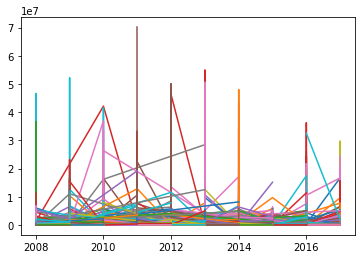

In [11]:
#Creating a list of artists

artists = ny_df['artist'].unique()

#Removing entries that didn't sell
ny_df_sales = ny_df[ny_df['adj_sale_price'] != 0]

#Creating a time series for each artist by year

for artist in artists:
    artist_df = ny_df_sales.loc[ny_df_sales['artist'] == artist]
    line = plt.plot(artist_df['year'], artist_df['adj_sale_price'], label=artist)


This isn't quite proper because the adj_sale_price column is not summed properly per year: will be trying to do that further down but it still shows a general picture of the sales per year that particular artists will have. This indicates that there are some standout artists that sell for very high prices at times, while other artists tend to clump towards less extreme prices. Another way to see trends more clearly may be to visualize the auction appearances and/or the cumulative value of sales for an artist over time.

In [12]:
#counting number of sales per year by artist
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()

for artist in artists:
    year_df = ny_df.loc[ny_df['artist'] == artist]
    year_df = year_df.groupby('year').size()
    #fig.add_traces(go.Scatter(x=year_df.index, y=year_df.values, mode='lines', name=artist))

#fig.show() 




Pretty messy and plotly gets very laggy with so many lines but this indicates again that there are lots some artists that have years where they will appear hundreds of times in auctions, while other artists will appear only a few times. 

Another point of analysis could be finding how many upward trending vs. downward trending artists there are.

Finding the cumulative value of sales per year should help with that.

In [18]:
#testing plots/methods on a single artist

yearlist = list(range(ny_df['year'].min(), ny_df['year'].max() + 1))
year_dict = dict.fromkeys(yearlist)
testdf = ny_df.loc[ny_df['artist'] == 'ANNA TICHO']

year_dict = dict.fromkeys(yearlist)

yearprice = testdf[['year', 'adj_sale_price']]

for index, row in yearprice.iterrows():
    if row['year'] in year_dict.keys():
        year_dict[row['year']] = float(year_dict[row['year']] or 0) + row['adj_sale_price']

testoutput = pd.DataFrame()
testoutput = testoutput.append(year_dict,ignore_index=True)
testoutput

# testdfprice = testdf.groupby('adj_sale_price').size()
# testdfyear = testdf.groupby('year').size()
# testdfprice
#plt.plot(testdfyear.index, testdfprice.index)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,105226.66,NaN,NaN,176688.53,0.0,0.0,14646.6,89957.94


In [56]:
#plotting the cumulative value of sales per year by artist
#fig = go.Figure()

yearlist = list(range(ny_df['year'].min(), ny_df['year'].max() + 1))
year_dict = dict.fromkeys(yearlist)

artist_sales_df = pd.DataFrame()

for artist in artists:
    year_dict = dict.fromkeys(yearlist)
    artist_df = ny_df.loc[ny_df['artist'] == artist]
    year_price = artist_df[['year', 'adj_sale_price']]
    for index, row in year_price.iterrows():
        if row['year'] in year_dict.keys():
            year_dict[row['year']] = float(year_dict[row['year']] or 0) + row['adj_sale_price']
    artist_sales_df = artist_sales_df.append(year_dict, ignore_index=True)

#Filling NaN's with 0
artist_sales_df = artist_sales_df.fillna(0)

artist_sales_df

    # years = artist_df.groupby('year').size()
    # sales = artist_df.groupby('adj_sale_price').sum()
    # plt.plot(years.index, sales.index)
    # #fig.add_traces(go.Scatter(x=years.index, y=sales.index, mode='lines', name=artist))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.00,0.00,0.00,0.00,0.00,0.00,6749.53,0.00,0.00,14341.12
1,0.00,0.00,8060.54,0.00,0.00,43897.77,0.00,0.00,0.00,5475.70
2,26717.26,126615.00,65949.86,142780.66,0.00,135808.73,0.00,59325.52,15978.11,0.00
3,4452.88,1288940.61,1183140.49,1307757.20,2015749.58,1296493.22,1179548.60,1718148.11,1061878.66,451093.42
4,0.00,0.00,105226.66,0.00,0.00,176688.53,0.00,0.00,14646.60,89957.94
...,...,...,...,...,...,...,...,...,...,...
15774,271922.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15775,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15776,72433.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15777,36810.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [24]:
#adding artist names as a column

artist_sales_df['artist'] = artists.tolist()
artist_sales_df.head()

#creating csv
artist_sales_df.to_csv('cum_artist_sales.csv')

Text(0.5, 1.0, 'Adjusted Sale Price Over Time per Artist')

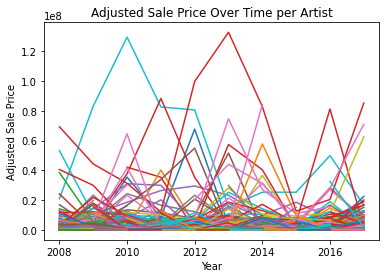

In [54]:
# import plotly.express as px
# import plotly.graph_objects as go
# fig = go.Figure()

#plotting cumulative artist sales
sales_df = artist_sales_df.drop(columns=['artist'])

index = 0
for index, row in sales_df.iterrows():
    plt.plot(row, label=artists[index])
    index += 1

plt.xlabel('Year')
plt.ylabel('Adjusted Sale Price')
plt.title('Adjusted Sale Price Over Time per Artist')
# plt.legend(loc='best')
# plt.show()


Still pretty messy, but some conclusions can still be drawn from this. There are some notable spikes for many artists, followed by a decrease. A potential reasoning for this can be that even if a very wealthy buyer buys a work for a high price, the artist will not consistently continue to sell at such a high price. Rather, to evaluate an artist's success, potential methods may include:

1. looking at how outliers/high sales impact an artist's sales in the future post the outlier
2. looking at whether or not artists consistently trend up or down over time, even if the value of their works goes down after an outlier sale.


In [55]:
#Finding whether an artist's works generally increase over time or not. Done by calculating moving averages across each row.

#Testing moving average function
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

testoutput = testoutput.fillna(0)

avg_test = np.all(np.diff(moving_average(np.array(testoutput), n=4))>0)
avg_test

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price,region
89063,1,ANNA TICHO,israeli & international art,N09638,USD,20-Dec-17,7000,NEW YORK,5000,WALLS OF JERUSALEM,5250,20,12,2017,5475.70,America
116596,86828,ANNA TICHO,israeli & international art,N09059,USD,17-Dec-13,18000,NEW YORK,12000,JERUSALEM: THE OLD CITY,22500,17,12,2013,24692.50,America
116600,86832,ANNA TICHO,israeli & international art,N09059,USD,17-Dec-13,12000,NEW YORK,8000,THE JERUSALEM BEGGAR,0,17,12,2013,0.00,America
116601,86833,ANNA TICHO,israeli & international art,N09059,USD,17-Dec-13,9000,NEW YORK,7000,AFGHAN JEW,0,17,12,2013,0.00,America
116602,86834,ANNA TICHO,israeli & international art,N09059,USD,17-Dec-13,8000,NEW YORK,6000,THE YEMENITE GIRL,0,17,12,2013,0.00,America
116624,86856,ANNA TICHO,israeli & international art,N09059,USD,17-Dec-13,18000,NEW YORK,12000,LANDSCAPE OF JERUSALEM,17500,17,12,2013,19205.27,America
123799,106210,ANNA TICHO,sotheby's | auctions - israeli & international...,N08921,USD,19-Dec-12,18000,NEW YORK,12000,ROCKY LANDSCAPE (OUTSIDE JERUSALEM),0,19,12,2012,0.00,America
123800,106211,ANNA TICHO,sotheby's | auctions - israeli & international...,N08921,USD,19-Dec-12,8000,NEW YORK,6000,JERUSALEM,0,19,12,2012,0.00,America
130733,126008,ANNA TICHO,"sotheby's | auctions - n08813,fine arts",N08813,USD,14-Dec-11,12000,NEW YORK,8000,JERUSALEM HILLS,0,14,12,2011,0.00,America
137031,145473,ANNA TICHO,sotheby's | auctions - israeli and internation...,N08690,USD,15-Dec-10,8000,NEW YORK,6000,THE BURNING BUSH,6875,15,12,2010,8060.54,America
